In [5]:
import pandas as pd

csv_path = '/opt/home/revoli/data_worker/interformer/poses/ligand/stat_V3FULLSET20240813A_i5j10.csv'
df = pd.read_csv(csv_path)
train_df = pd.read_csv('/opt/home/revoli/data_worker/interformer/train/general_PL_2020.csv')
df.head(21)

,Unnamed: 0,filename_input,pdb_id,pose_rank,num_atoms_heavy,num_torsions,pose,energy,energy_grid,energy_nogrid,...,loss_intra_1_post_refinement,loss_total_0_pre_refinement,loss_total_1_post_refinement,vdwdistance_inter_min_0_pre_refinement,vdwdistance_inter_min_1_post_refinement,weight_collision_inter_0_pre_refinement,weight_collision_inter_1_post_refinement,weight_intra_0_pre_refinement,weight_intra_1_post_refinement,sdf_rank
0,0,10gs_docked.sdf,10gs,0,33,13,"[10.460617282838525, 6.943886527861714, 27.961...",-1041.088345,-1041.088345,-1044.299680,...,16.249961,-1052.934909,-1041.807048,-1.191400,-0.734489,5.0,5.0,30.0,30.0,0
1,1,10gs_docked.sdf,10gs,1,33,13,"[10.416346791057641, 6.761791818840008, 27.676...",-929.957976,-929.957976,-928.668867,...,75.630249,-1002.595428,-931.294415,-1.116668,-0.855495,5.0,5.0,30.0,30.0,0
2,2,10gs_docked.sdf,10gs,2,33,13,"[10.370775106039785, 6.918971388032188, 27.170...",-861.555433,-861.555433,-849.526773,...,45.448649,-983.555528,-860.890763,-1.367976,-0.771597,5.0,5.0,30.0,30.0,0
3,3,10gs_docked.sdf,10gs,3,33,13,"[10.873634888566775, 7.2156415612614975, 27.21...",-684.506777,-684.506777,-680.150750,...,33.782499,-767.471860,-684.244727,-1.401105,-0.750642,5.0,5.0,30.0,30.0,0
4,4,10gs_docked.sdf,10gs,4,33,13,"[9.946785548893683, 7.251381667378913, 26.4828...",-561.871814,-561.871814,-567.541528,...,4.486338,-744.012796,-560.803651,-1.492481,-0.810353,5.0,5.0,30.0,30.0,0
5,5,10gs_docked.sdf,10gs,5,33,13,"[10.252622851348772, 7.301397825192513, 27.510...",-737.138284,-737.138284,-724.741984,...,16.057874,-739.637808,-739.637808,-0.940816,-0.940816,5.0,5.0,30.0,30.0,0
6,6,10gs_docked.sdf,10gs,6,33,13,"[10.415198892246663, 6.566562422920484, 28.169...",-702.262495,-702.262495,-692.774975,...,60.579537,-703.312094,-703.312094,-0.947845,-0.947845,5.0,5.0,30.0,30.0,0
7,7,10gs_docked.sdf,10gs,7,33,13,"[11.433027493705618, 7.378149868151331, 25.999...",-523.422655,-523.422655,-515.428211,...,31.158543,-650.214768,-523.967946,-1.415281,-0.909316,5.0,5.0,30.0,30.0,0
8,8,10gs_docked.sdf,10gs,8,33,13,"[10.493734637586469, 7.025259710153472, 25.250...",-507.006884,-507.006884,-512.666274,...,3.374740,-602.193714,-507.378683,-1.232001,-1.332225,5.0,5.0,30.0,30.0,0
9,9,10gs_docked.sdf,10gs,9,33,13,"[10.737800019979879, 7.0649486958986945, 26.80...",-501.696234,-501.696234,-498.100014,...,7.517575,-598.437166,-501.502291,-1.435902,-0.702760,5.0,5.0,30.0,30.0,0


Top1: 1.0


<Axes: >

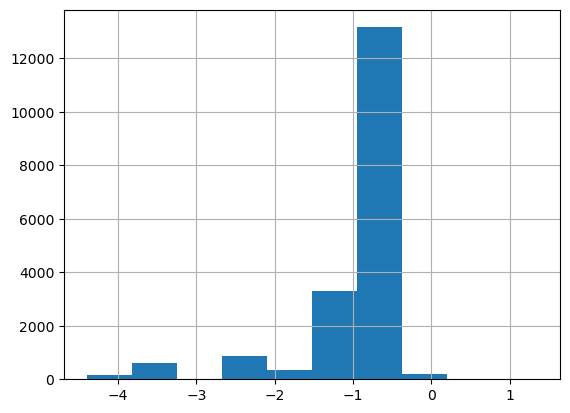

In [6]:
# top1 = df.groupby('pdb_id').head(1)
top1 = df[df['pose_rank'] == 20]
print("Top1:", (top1['rmsd'] < 2.).sum() / len(top1))
top1['vdwdistance_inter_min_1_post_refinement'].hist()
# top1[top1['vdwdistance_inter_min_1_post_refinement'] < -1.3]

In [7]:
# review only
# df[df['pdb_id'] == '3shj']

In [8]:
# trune floatpoint
df['rmsd'] = df['rmsd'].map(lambda x: 0. if x < 0.01 else x)
# Merge with origin dataframe
new_df = df[['pdb_id', 'pose_rank', 'vdwdistance_inter_min_1_post_refinement', 'energy', 'rmsd']]
# new_df = new_df[(new_df['pose_rank'] < 10) | (new_df['pose_rank'] == 20)]  # only grep first 10 and the crystal ligand
new_df = new_df.rename(columns={'pdb_id': 'Target'})
new_df = new_df.astype({'pose_rank': int, 'Target': str})
# Merge
merge = new_df.merge(train_df, how='outer', on='Target')
# Drop those failed to produce docking pose.
merge = merge[~merge['pose_rank'].isna()]
merge = merge[~merge['Year'].isna()]
# Label
merge = merge.astype({'pose_rank': int, 'Year': int})
merge = merge.sort_values(['Year', 'Target'])
merge.loc[merge['rmsd'] > 2., 'pIC50'] *= -1.
###
# TODO: below may affect the performance of PoseScore
# we label those clashes case to be negative, for only crystal has no clash first
# thr = -1.3
# no_clashes_pdbs = merge[(merge['pose_rank'] == 20) & (merge['vdwdistance_inter_min_1_post_refinement'] > thr)]['Target'].tolist()
# print("qualify_pdbs:", len(no_clashes_pdbs))
# problem_ids = []
# for i, row in merge[merge['Target'].isin(no_clashes_pdbs)].iterrows():
#   if row['vdwdistance_inter_min_1_post_refinement'] < thr:
#     problem_ids.append(i)
# print(f'problem_ids:{len(problem_ids)}')
# merge.loc[problem_ids, 'pIC50'] = merge.loc[problem_ids, 'pIC50'].apply(lambda x: -1. * abs(x))
###
merge

,Target,pose_rank,vdwdistance_inter_min_1_post_refinement,energy,rmsd,Year,Uniprot,ProteinName,Resolution,pIC50,Unit,Molecule ID
86509,2tpi,0,-1.346957,-304.862471,3.91918,1982,P00760,TRYPSINOGEN,2.10,-4.31,Kd=49uM,2-mer
86510,2tpi,1,-0.433616,-78.062479,9.44386,1982,P00760,TRYPSINOGEN,2.10,-4.31,Kd=49uM,2-mer
86511,2tpi,2,-0.990742,-369.452446,4.12022,1982,P00760,TRYPSINOGEN,2.10,-4.31,Kd=49uM,2-mer
86512,2tpi,3,-1.954053,-230.072198,4.69025,1982,P00760,TRYPSINOGEN,2.10,-4.31,Kd=49uM,2-mer
86513,2tpi,4,-1.629936,-334.997928,5.06893,1982,P00760,TRYPSINOGEN,2.10,-4.31,Kd=49uM,2-mer
...,...,...,...,...,...,...,...,...,...,...,...,...
392675,6v1c,16,-1.434826,-159.545438,11.82580,2019,Q07654,TREFOIL FACTOR 3,1.55,-4.19,Kd=65uM,4A4
392676,6v1c,17,-0.210785,-171.821068,6.31894,2019,Q07654,TREFOIL FACTOR 3,1.55,-4.19,Kd=65uM,4A4
392677,6v1c,18,-0.878655,-229.922485,7.42223,2019,Q07654,TREFOIL FACTOR 3,1.55,-4.19,Kd=65uM,4A4
392678,6v1c,19,-1.064931,-208.434740,6.06957,2019,Q07654,TREFOIL FACTOR 3,1.55,-4.19,Kd=65uM,4A4


In [9]:
merge[(merge['rmsd'] < 2.) & (merge['pIC50'] < 0.)]

,Target,pose_rank,vdwdistance_inter_min_1_post_refinement,energy,rmsd,Year,Uniprot,ProteinName,Resolution,pIC50,Unit,Molecule ID


In [10]:
#######
# Output
# Full
merge.to_csv('/opt/home/revoli/data_worker/interformer/train/general_PL_2020_round0_full.csv', index=False)
# Drop those RMSD > 0.5 and < 2.
filter_df = merge[(merge['rmsd'] < 0.1) | (merge['rmsd'] > 2.5)]
filter_df.to_csv('/opt/home/revoli/data_worker/interformer/train/general_PL_2020_round0.csv', index=False)
filter_df

,Target,pose_rank,vdwdistance_inter_min_1_post_refinement,energy,rmsd,Year,Uniprot,ProteinName,Resolution,pIC50,Unit,Molecule ID
86509,2tpi,0,-1.346957,-304.862471,3.91918,1982,P00760,TRYPSINOGEN,2.10,-4.31,Kd=49uM,2-mer
86510,2tpi,1,-0.433616,-78.062479,9.44386,1982,P00760,TRYPSINOGEN,2.10,-4.31,Kd=49uM,2-mer
86511,2tpi,2,-0.990742,-369.452446,4.12022,1982,P00760,TRYPSINOGEN,2.10,-4.31,Kd=49uM,2-mer
86512,2tpi,3,-1.954053,-230.072198,4.69025,1982,P00760,TRYPSINOGEN,2.10,-4.31,Kd=49uM,2-mer
86513,2tpi,4,-1.629936,-334.997928,5.06893,1982,P00760,TRYPSINOGEN,2.10,-4.31,Kd=49uM,2-mer
...,...,...,...,...,...,...,...,...,...,...,...,...
392675,6v1c,16,-1.434826,-159.545438,11.82580,2019,Q07654,TREFOIL FACTOR 3,1.55,-4.19,Kd=65uM,4A4
392676,6v1c,17,-0.210785,-171.821068,6.31894,2019,Q07654,TREFOIL FACTOR 3,1.55,-4.19,Kd=65uM,4A4
392677,6v1c,18,-0.878655,-229.922485,7.42223,2019,Q07654,TREFOIL FACTOR 3,1.55,-4.19,Kd=65uM,4A4
392678,6v1c,19,-1.064931,-208.434740,6.06957,2019,Q07654,TREFOIL FACTOR 3,1.55,-4.19,Kd=65uM,4A4


In [11]:
# EDA
# Number of Positive V.S. Negatives
tp = (merge['pIC50'] > 0.).sum()
print(f"All-TP/N->{tp}/{len(merge)}, {tp / len(merge)}") # 
##
tp = (filter_df['pIC50'] > 0.).sum()
print(f"Filter-TP/N->{tp}/{len(filter_df)}, {tp / len(filter_df)}") # 

All-TP/N->87579/392406, 0.2231846607850033
Filter-TP/N->18807/301222, 0.062435678668888724


In [12]:
# Eda on resolution
check = merge[merge['Resolution'] != 'NMR']
check = check.astype({'Resolution': float})
check = check[check['Resolution'] > 4.]
check

,Target,pose_rank,vdwdistance_inter_min_1_post_refinement,energy,rmsd,Year,Uniprot,ProteinName,Resolution,pIC50,Unit,Molecule ID
49673,1xxi,0,-0.704050,-1618.553152,0.215815,2004,P06710,"DNA POLYMERASE III, DELTA SUBUNIT",4.1,5.52,Kd=3.0uM,ADP
49674,1xxi,1,-0.766345,-1420.302988,1.845460,2004,P06710,"DNA POLYMERASE III, DELTA SUBUNIT",4.1,5.52,Kd=3.0uM,ADP
49675,1xxi,2,-0.990348,-1331.769540,3.095600,2004,P06710,"DNA POLYMERASE III, DELTA SUBUNIT",4.1,-5.52,Kd=3.0uM,ADP
49676,1xxi,3,-0.765457,-1279.761949,4.116460,2004,P06710,"DNA POLYMERASE III, DELTA SUBUNIT",4.1,-5.52,Kd=3.0uM,ADP
49677,1xxi,4,-0.749373,-1225.763971,3.495080,2004,P06710,"DNA POLYMERASE III, DELTA SUBUNIT",4.1,-5.52,Kd=3.0uM,ADP
...,...,...,...,...,...,...,...,...,...,...,...,...
354132,6dzy,16,-1.832959,-103.461072,12.760000,2019,P31645,SODIUM-DEPENDENT SEROTONIN TRANSPORTER,4.1,-5.52,Ki=3uM,HJM
354133,6dzy,17,-1.915658,-30.602892,11.841200,2019,P31645,SODIUM-DEPENDENT SEROTONIN TRANSPORTER,4.1,-5.52,Ki=3uM,HJM
354134,6dzy,18,-2.344666,-15.246933,13.760000,2019,P31645,SODIUM-DEPENDENT SEROTONIN TRANSPORTER,4.1,-5.52,Ki=3uM,HJM
354135,6dzy,19,-2.574509,-12.444197,9.083330,2019,P31645,SODIUM-DEPENDENT SEROTONIN TRANSPORTER,4.1,-5.52,Ki=3uM,HJM
